# Problem 2 - MNIST Classification Walkthrough

In [2]:
#Import Necessary Libraries
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, Input, MaxPooling2D
import numpy as np
import pandas as pd
import os

## Overview

As we saw in problem 1, regression seems to work fairly well, so let's take a crack at classification using the MNIST dataset.

The MNIST dataset is a collection of handwritten digits, from 0 to 9, that has been used as an example dataset to showcase machine learning models' capabilities to interpret human readable text. We will attempt to do the same using a similar model to that which has been shown in problem 1 and a new convolutional model.

In [3]:
data = np.load('mnist.npz')

# load pre-decided train and test data
X_train, y_train = data['x_train'], data['y_train']
X_test, y_test = data['x_test'], data['y_test']

## (a) Visualization

Use matplotlib to visualize any one image of each digit. (Hint: use plt.imshow)

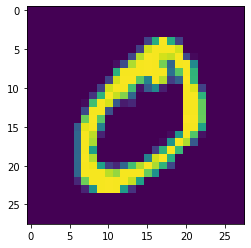

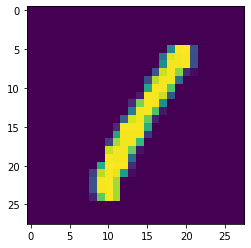

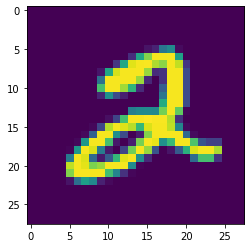

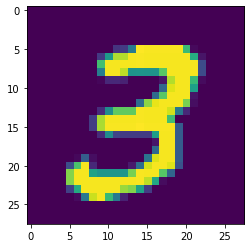

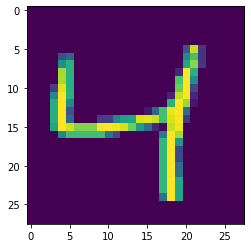

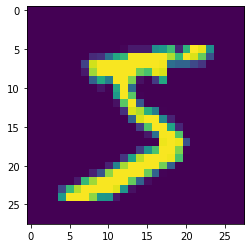

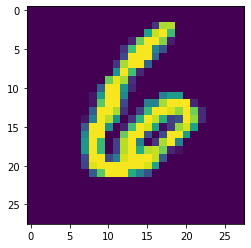

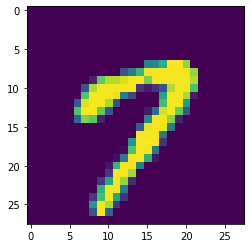

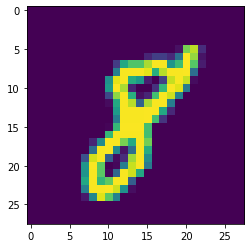

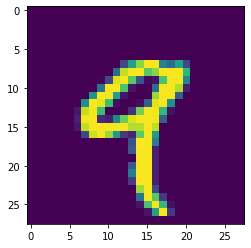

In [3]:
#Solution

for label in sorted(set(y_train)):
    idx = np.where(y_train==label)[0][0]
    plt.imshow(X_train[idx])
    plt.show()

## (b) Preprocessing

We need to pre-process the data to make the neural network as effective as possible - we need to normalize the data. There are a lot of simple ways to do this for MNIST. One possible way is to do 0-1 normalization by dividing by 255, which is the highest pixel value. Let us do this to both the X_train and X_test arrays. 

Additionally, since y has categorical data, let us one hot encode it using keras.utils.to_categorical.

In [1]:
# Solution

X_train_norm = X_train / 255
X_test_norm = X_test / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

NameError: name 'X_train' is not defined

## (c) Classic MLP

Using the note, lecture, and example from problem 1, create a classic MLP with 3 dense hidden layers with 256, 184, and 128 units respectively using 'relu' activation. Then add a dense output layer with 10 units with 'softmax' activation.

In [ ]:
#Solution

# initialize our Sequential model: this will take in a series of 
# sequential input, hidden and output layers using .add(...)
model = Sequential()

# hidden layers
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 184, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu')) 

# add output layer, specifying that we want one output number
model.add(Dense(units = 10, activation = 'softmax'))

model.summary()

## (d) Train the model

Now, we just need to use our training data to fit our model. You don't need to write any code for this part, just comment on the results.


In [ ]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train_norm, y_train, epochs = 5)

In [ ]:
loss, acc = model.evaluate(X_test_norm, y_test, verbose = 0)
print("Test Loss:", loss)
print("Test Accuracy:", acc)

## (e) Experimentation

Not bad! We can classify around 97-98% of the test set correctly using around 500,000 parameters. However, do we need so many parameters? Experiment with using less units in the hidden fully-connected layers. Comment on the performance of the model with 100, 1000, and 10000 parameters.

_*With 100 and 1,000 parameters, the model does not perform as well as the original one. However, with 10,000 parameters the difference with the 500,000 parameter one is not too noticable (with the correct number of epochs it should even perform better). Intuitively, this can be understood by the fact that 500,000 parameters is larger than size of the actual dataset, hence a large part of these parameters will not even be trained*_

## (f) Convolutional Neural Network

We will now train a model more suited to this task, the convolutional neural network, with a similar number of parameters to compare their performance. This section may take a while to run (upwards of 10 minutes), so be patient!

The layers that we use in this section are much more complex than the typical Dense (fully-connected) layer. We explain each layer and its purpose below:

* Conv2D - This is the convolutional layer, with a particular number of filters. We can customize properties of this layer such as the attached activation function, padding schemes, kernel and stride sizes, and regularization. We typically don't specify all of these parameters as most default to a reasonable setting; the most important parameters are the number of filters and the kernel size.
* MaxPooling2D - This is the pooling layer, which compresses the input data by striding and picking the maximal value in each grid specified by the pool size.
* Flatten - This flattens a multidimensional tensor into a single dimensional tensor, often near the end of a classification neural network.
* Dropout - This serves as a form of regularization that zeroes a proportion of all parameters and rescales the remaining parameters accordingly.

In [ ]:
# initialize our Sequential model: this will take in a series of 
# sequential input, hidden and output layers using .add(...)
model = Sequential()

# hidden layers
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same', input_shape = (28, 28, 1)))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())

# add output layer, specifying that we want one output number
model.add(Dense(units = 10, activation = 'softmax'))

model.summary()

In [ ]:
# fitting the model can take upwards of 10 minutes
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train_norm.reshape((60000, 28, 28, 1)), y_train, epochs = 2, batch_size = 64);

Before we evaluate the model, we ought to discuss the performance of the first Dense-based model as compared to this new convolutional neural network. Even though the number of parameters are similar, the time required per epoch is almost a couple of orders of magnitude higher. This fundamentally comes down to the types of tasks that a CPU is equipped to handle efficiently - in this case, the convolution operation is simply just not as efficient enough on a CPU. To solve this issue, we typically use a GPU to train the network since its SIMD (single instruction, multiple data-streams) capabilities far outweigh a conventional CPU.

Keeping this in mind, let's evaluate the performance of the model.

In [ ]:
loss, acc = model.evaluate(X_test_norm.reshape((-1, 28, 28, 1)), y_test, verbose = 0)
print("Test Loss:", loss)
print("Test Accuracy:", acc)

## (g) Tradeoff

Discuss the tradeoffs of using the first model as opposed to this second model for the MNIST classification problem.

_*As already mentioned, one of the large tradeoffs, especially when using a CPU is the training time for these models. Apart from that, this model seems to have some higher levels of performance, while also accounting more for common issues like overfitting (with dropout) or slight shifts (with max pooling). Additionally, we're adding complexity which inherently makes the model less interpretable*_

## (h) Generators

Consider the issues that arise when a larger dataset is used with a convolutional neural network framework. Typically, training becomes a longer process, but memory is a source for concern as well. Some datasets in the real world are well into the tens or hundreds of gigabytes or terabytes. We wish to dynamically load our data when it's required, but the current data format requires our data to be passed in as a contiguous array in memory.

Let's modify that by using Keras' inbuilt support for Python generators as data sources. You don't need to write any code for this section.

In [ ]:
# use the same model as previously, but retrain it using our custom generator
def data_gen(X_train, y_train):
    while True:
        for i in range(0, len(X_train), 32):
            yield X_train[i:i+32], y_train[i:i+32]

model.fit(data_gen(X_train_norm.reshape((60000, 28, 28, 1)), y_train), steps_per_epoch = len(X_train) // 500);